<a href="https://colab.research.google.com/github/lazy-wolf/Sample/blob/main/HuggingFace_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image
import tensorflow_datasets as tfds
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from google.colab import drive
from sklearn.metrics import accuracy_score

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
train_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Beans/train"
batch_size = 32
img_height = 128
img_width = 128
train_data = tf.keras.utils.image_dataset_from_directory(train_directory,
                                                         validation_split=None,
                                                         seed=123,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 1034 files belonging to 3 classes.


In [5]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
validation_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Beans/validation"
batch_size = 32
img_height = 128
img_width = 128
validation_data = tf.keras.utils.image_dataset_from_directory(validation_directory,
                                                         validation_split=None,
                                                         seed=123,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 133 files belonging to 3 classes.


In [7]:
validation_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
test_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Beans/test"
batch_size = 32
img_height = 128
img_width = 128
test_data = tf.keras.utils.image_dataset_from_directory(test_directory,
                                                         validation_split=None,
                                                         seed=123,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 128 files belonging to 3 classes.


In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [10]:
model_handle = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"

feature_extractor = hub.KerasLayer(model_handle,
                                   trainable=True)
num_class = 3
model = tf.keras.Sequential(
    [
        normalization_layer,
        feature_extractor,
        tf.keras.layers.Dense(num_class, activation="softmax")
    ]
)
model.build([None, 128, 128, 3])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 3)                 3006      
                                                                 
Total params: 1695495 (6.47 MB)
Trainable params: 1681415 (6.41 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


In [13]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"]
             )


# Callbacks--> Stop training automatically once the model performance stop improving
learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=2,factor=0.5, min_lr=0.00001,verbose =1)
Early_Stopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5, restore_best_weights=True)

# Fit the model
history1= model.fit(train_data, epochs=20, validation_data= validation_data,callbacks=[Early_Stopping,learning_rate_reduction], verbose=1)

Epoch 1/20
33/33 [==============================] - 153s 4s/step - loss: 1.4911 - accuracy: 0.8298 - val_loss: 2.3022 - val_accuracy: 0.7578 - lr: 0.0010
Epoch 2/20
33/33 [==============================] - 32s 932ms/step - loss: 0.4935 - accuracy: 0.8936 - val_loss: 4.2497 - val_accuracy: 0.7266 - lr: 0.0010
Epoch 3/20
33/33 [==============================] - ETA: 0s - loss: 0.2149 - accuracy: 0.9642
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
33/33 [==============================] - 32s 921ms/step - loss: 0.2149 - accuracy: 0.9642 - val_loss: 6.0870 - val_accuracy: 0.6953 - lr: 0.0010
Epoch 4/20
33/33 [==============================] - 33s 969ms/step - loss: 0.2280 - accuracy: 0.9797 - val_loss: 1.9001 - val_accuracy: 0.8516 - lr: 5.0000e-04
Epoch 5/20
33/33 [==============================] - 32s 954ms/step - loss: 0.2352 - accuracy: 0.9545 - val_loss: 1.7928 - val_accuracy: 0.8203 - lr: 5.0000e-04
Epoch 6/20
33/33 [==============================] - 32s

In [17]:
loss, accuracy= model.evaluate(test_data)
print(f"loss is:{loss}")
print(f"accuacy is:{accuracy}")

4/4 [==============================] - 1s 116ms/step - loss: 0.4635 - accuracy: 0.8984
loss is:0.46353858709335327
accuacy is:0.8984375


In [20]:
history_resnet50= pd.DataFrame(history1.history)
history_resnet50.head()

loss  accuracy  val_loss  val_accuracy      lr
0  1.491090  0.829787  2.302154      0.757812  0.0010
1  0.493502  0.893617  4.249747      0.726562  0.0010
2  0.214926  0.964217  6.087013      0.695312  0.0010
3  0.227982  0.979691  1.900056      0.851562  0.0005
4  0.235202  0.954545  1.792811      0.820312  0.0005

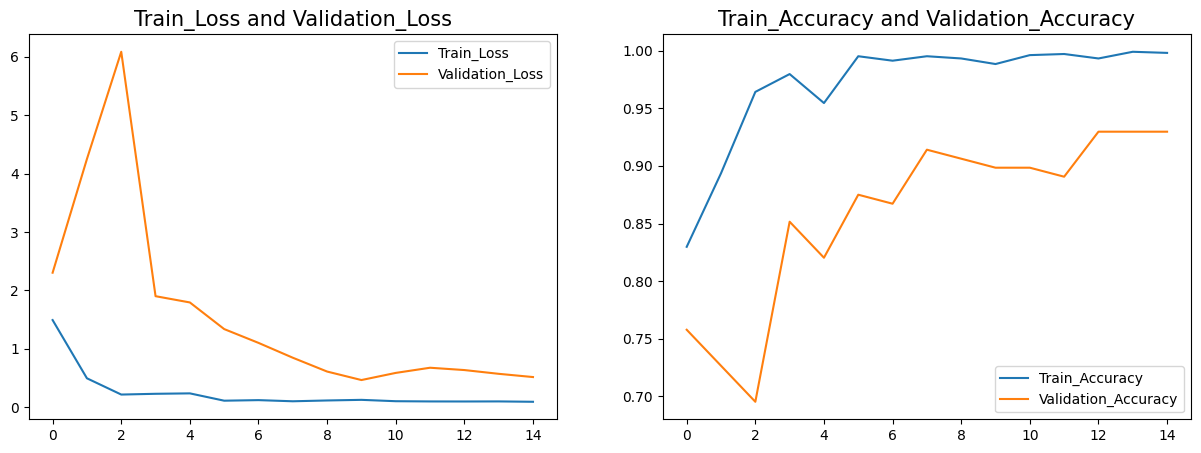

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_resnet50['loss'],label='Train_Loss')
plt.plot(history_resnet50['val_loss'],label='Validation_Loss')
plt.title('Train_Loss and Validation_Loss',fontsize=15)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_resnet50['accuracy'],label='Train_Accuracy')
plt.plot(history_resnet50['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy and Validation_Accuracy',fontsize=15)
plt.legend()
plt.show()

In [22]:
x_test=[]
y_test=[]
y_pred=[]

for images, labels in test_data:
    x_test.extend(images.numpy())
    y_test.extend(labels.numpy())


predictions=model.predict(np.array(x_test))
for i in predictions:
    y_pred.append(np.argmax(i))

4/4 [==============================] - 2s 203ms/step


In [24]:
class_names =train_data.class_names
print(class_names)

['angular_leaf_spot', 'bean_rust', 'healthy']


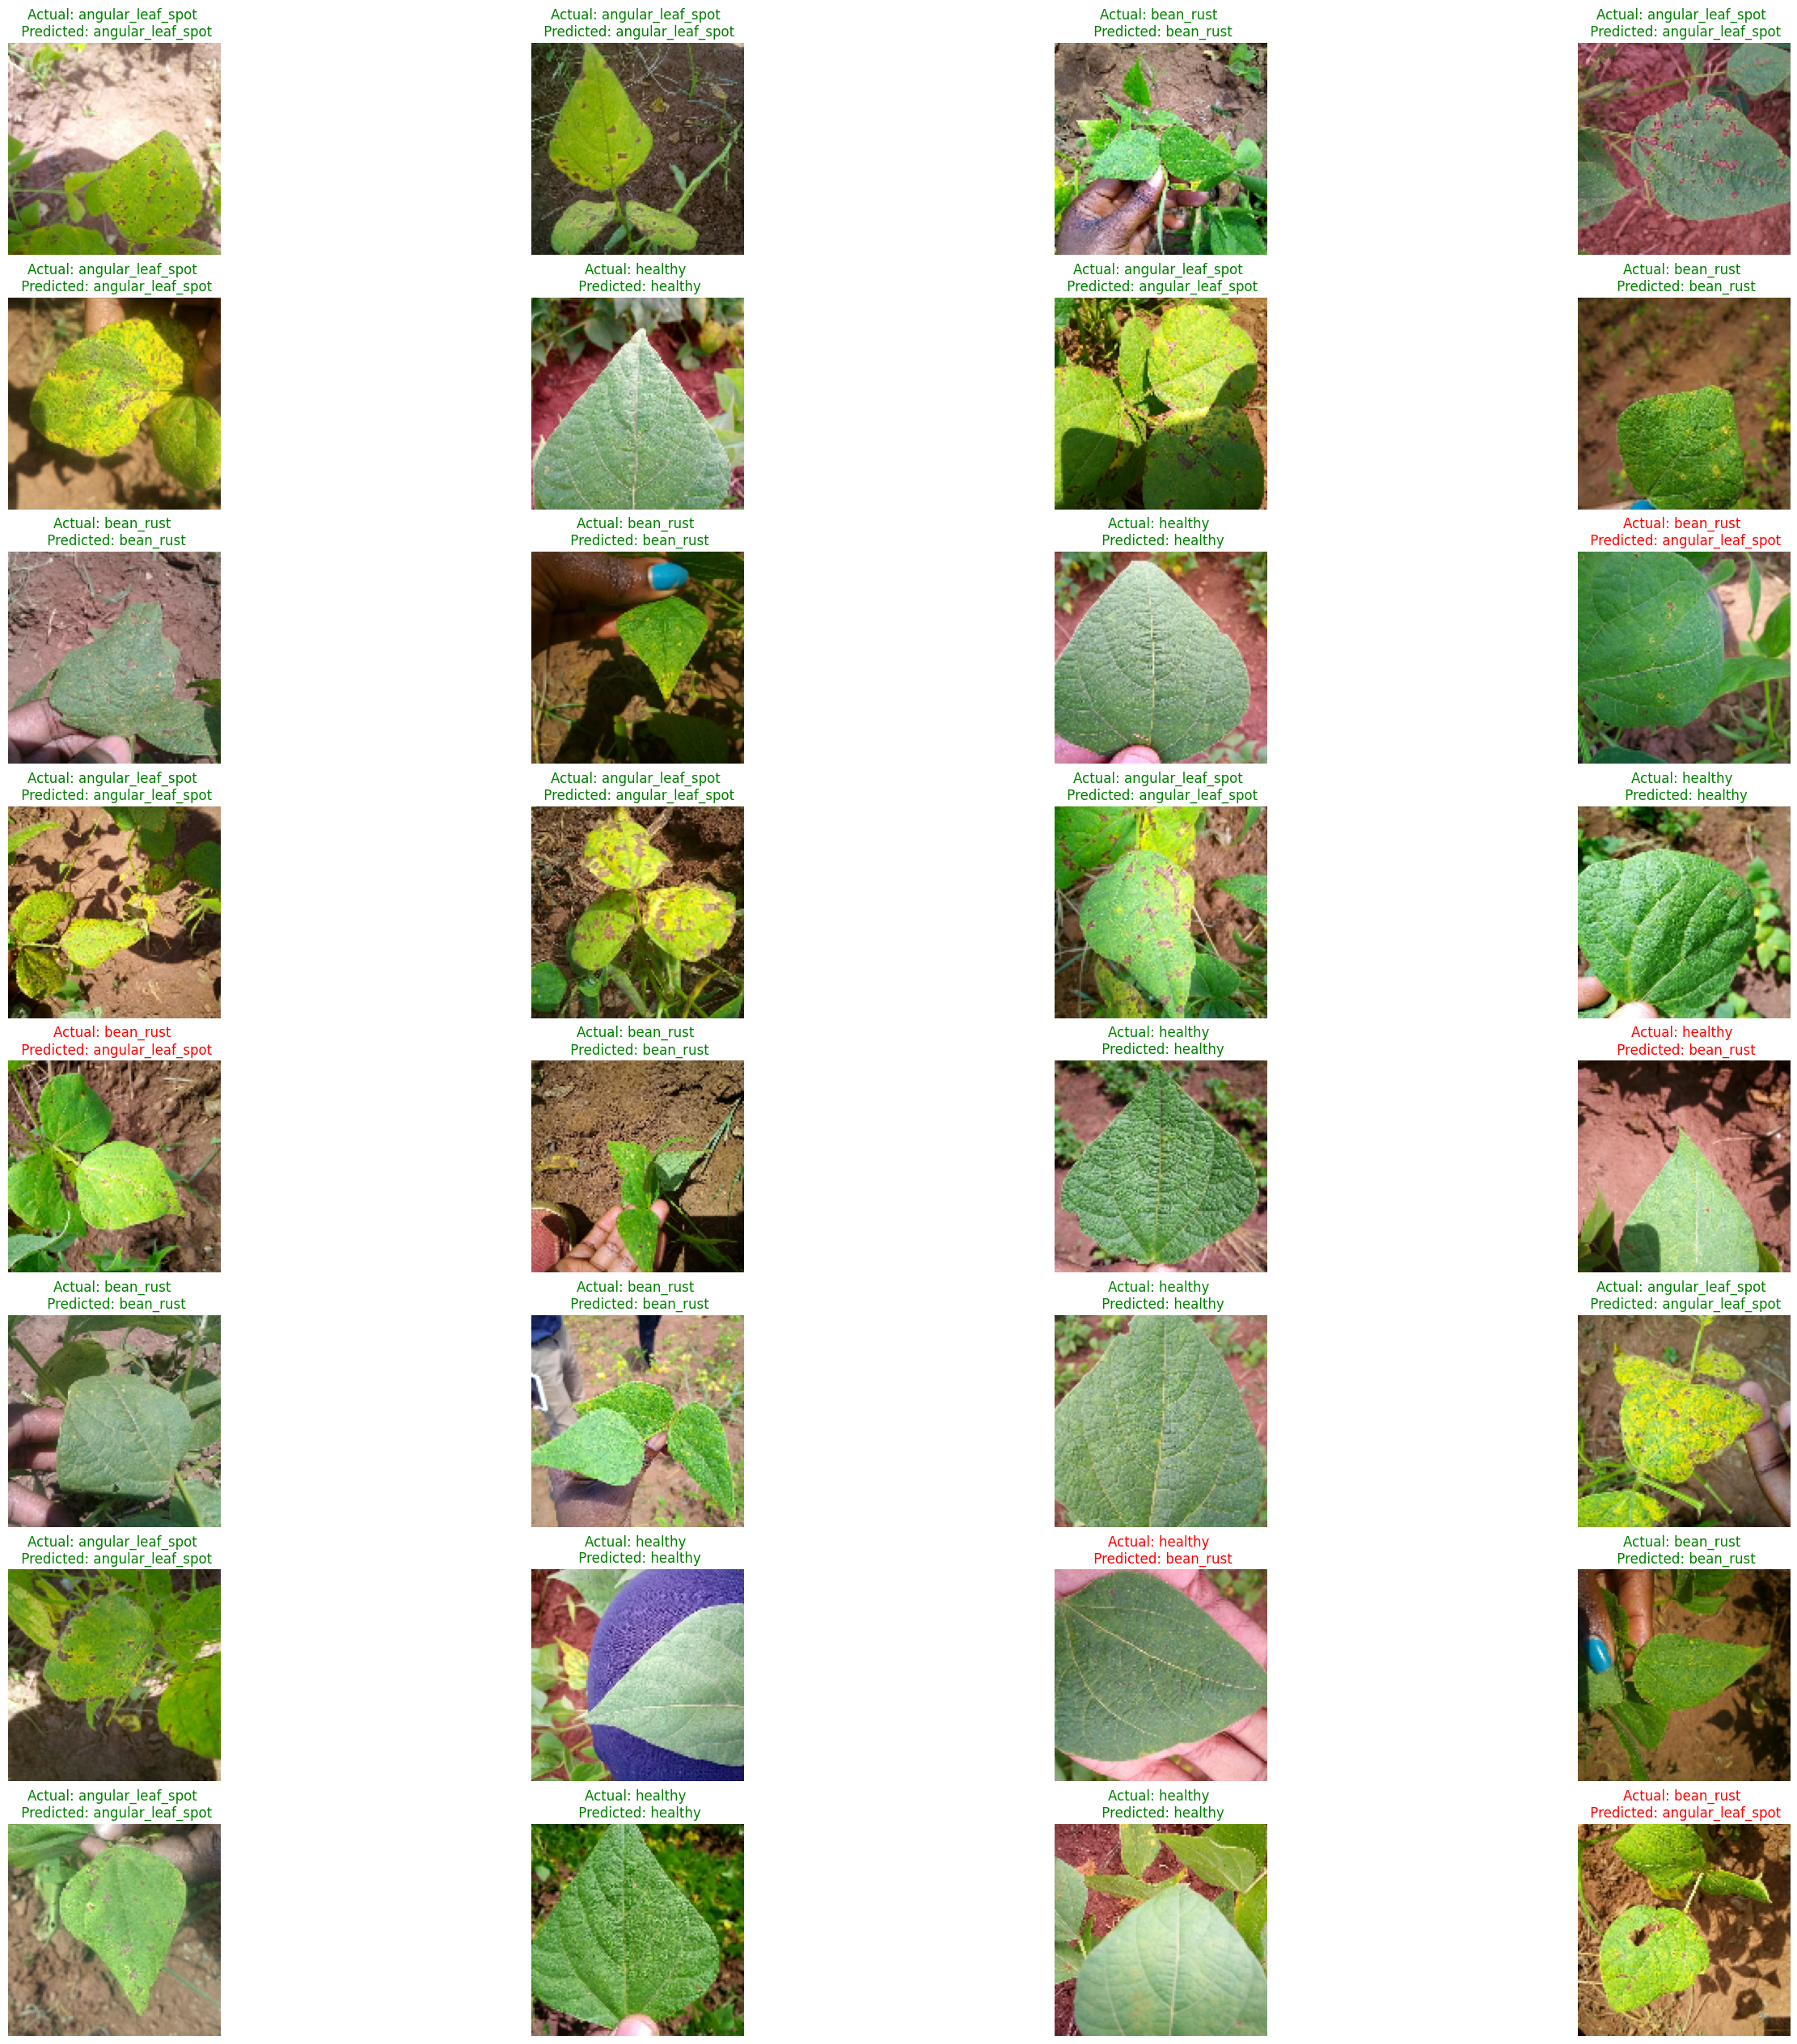

In [25]:
plt.figure(figsize=(32, 32))

for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(x_test[i].astype("uint8"))
    actual_label = class_names[y_test[i]]
    predicted_label = class_names[y_pred[i]]

    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color = 'green'
    else:
        label_color = 'red'

    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color)
    plt.axis("off")

plt.show()

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

F1-Score:[0.8996853062212539]
Precision:[0.8984865263935031]
Recall:[0.9029693710544775]
Classification_Report
-----------------------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.83      0.91      0.87        43
           2       0.97      0.90      0.94        42

    accuracy                           0.90       128
   macro avg       0.90      0.90      0.90       128
weighted avg       0.90      0.90      0.90       128

Confusion_Matrix
----------------------


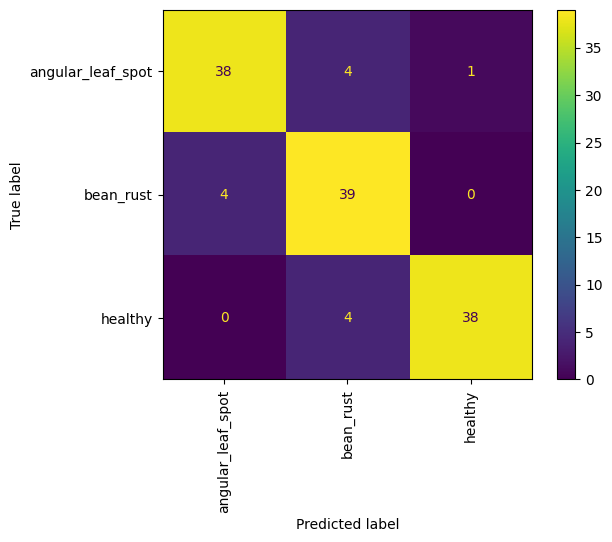

In [27]:
f1_scores=[]
precision_scores=[]
recall_scores=[]

f1_scores.append(f1_score(y_pred, y_test, average="macro"))
precision_scores.append(precision_score(y_pred, y_test, average="macro"))
recall_scores.append(recall_score(y_pred, y_test, average="macro"))


# Print the Results
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")



print("Classification_Report")
print("-----------------------")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, xticks_rotation="vertical")
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix as a DataFrame
dataframe= pd.DataFrame(confusion_matrix(y_test, y_pred), columns=class_names, index=class_names)

# Print the DataFrame
print(dataframe)

                   angular_leaf_spot  bean_rust  healthy
angular_leaf_spot                 38          4        1
bean_rust                          4         39        0
healthy                            0          4       38


In [36]:
stat_dataframe=dataframe
columns=stat_dataframe.columns.to_list()
stat_dataframe.columns=columns
stat_dataframe

angular_leaf_spot  bean_rust  healthy
angular_leaf_spot                 38          4        1
bean_rust                          4         39        0
healthy                            0          4       38

In [32]:
import seaborn as sns

In [38]:
model_name=["ResNet50"]
result_df= pd.DataFrame({"F1_Score":f1_scores, "Precision_Score":precision_scores, "Recall_Score":recall_scores}, index=model_name)
result_df= result_df.T.sort_values(by="ResNet50", ascending=False)
result_df

ResNet50
Recall_Score     0.902969
F1_Score         0.899685
Precision_Score  0.898487

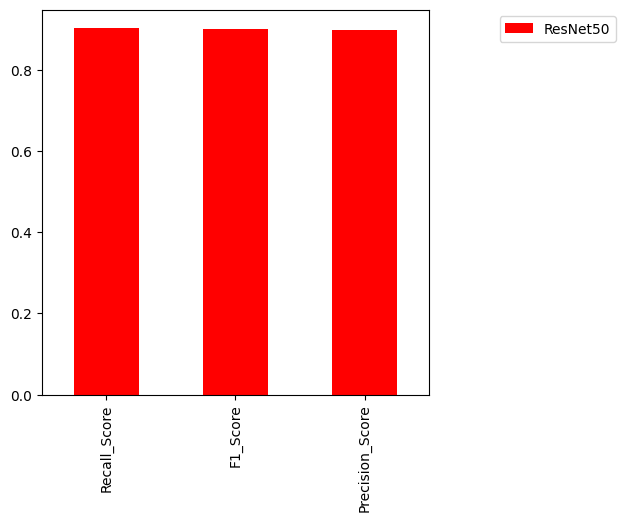

In [39]:
result_df.plot(kind="bar",figsize=(5,5), color="red").legend(bbox_to_anchor=(1.5,1))